# 4 Time series 

__Roadmap of time series analysis:__

__Part 1 Random walk approach:__

Data --> Stationarity? -->(ADF test) -Yes-> Plot ACF --> Autocorrelation? -Yes-> Not a random walk (No ---> It is a random walk)
                            
---Not Stationarity--> Apply transformations/ differencing (e.g., log function to stabilise its variance, first-order differencing)

__Part 2 ARIMA approach:__

Non-stationarity --> find the d (differenced times) --> list(p, q) (from ACF and PACF) --> ARIMA (p, d, q) --> AIC optimisation --> Residual analysis (Q-Q plot, Uncorrelated)--> Forecasting

## 4.1 Time series analysis fundamentals

__Defination:__ A time series is a collection of data points ordered in time. Typically, these data points are spaced at consistent intervals, such as hourly, monthly, or yearly.

__Decomposition:__ Time series decomposition is a process by which we separate a time series into its components: trend, seasonality, and residuals.
- *The trend* represents the slow-moving changes in a time series. It is responsible formaking the series gradually increase or decrease over time.
- *The seasonality* component represents the seasonal pattern in the series. The cyclesoccur repeatedly over a fixed period of time.
- *The residuals* represent the behavior that cannot be explained by the trend and seasonalitycomponents. They correspond to random errors, also termed white noise.

### 4.1.1 Random walk

A random walk is a process in which there is an equal chance of going up or down by a random number. 

In other words, a random walk is a series whose first difference is stationary and uncorrelated. 

This means that the process moves completely at random. 

**Note:** Because a random process takes random steps into the future, we cannot use statistical or deep learning techniques to fit such a process: 

there is nothing to learn from randomness and it cannot be predicted. Instead, we must rely on naive forecasting methods (df.shift()).

### 4.1.2 Stationarity

A stationary time series is one whose statistical properties do not change over time. 

In other words, it has a constant mean, variance, and autocorrelation, and these properties are independent of time.

__Some models assume stationarity:__ **The moving average model (MA), autoregressive model (AR), and autoregressive moving average model(ARMA).** 

__Augmented Dickey-Fuller (ADF) test__

The augmented Dickey-Fuller (ADF) test helps us determine if a time series is stationary by testing for the presence of a unit root. 

If a unit root is present, the time series is not stationary.  

The null hypothesis states that a unit root is present, meaning that our time series is not stationary.

You can download the sample data from [here.](https://hullacuk-my.sharepoint.com/:x:/g/personal/tongxin_chen_hull_ac_uk/EVTluUHhUT1HrBSp0gnNTZgBRspwhST-4s9NO5Dx6-ifyQ?e=irkgWJ)

In [318]:
import pandas as pd
import numpy as np

In [319]:
# load the sample data
df_data = pd.read_csv('ts_sample_data.csv', index_col=0)

In [320]:
df_data

date   data
0   2021-01-01   0.71
1   2021-01-02   0.63
2   2021-01-03   0.85
3   2021-01-04   0.44
4   2021-01-05   0.61
..         ...    ...
79  2021-03-21   9.99
80  2021-03-22  16.20
81  2021-03-23  14.67
82  2021-03-24  16.02
83  2021-03-25  11.61

[84 rows x 2 columns]

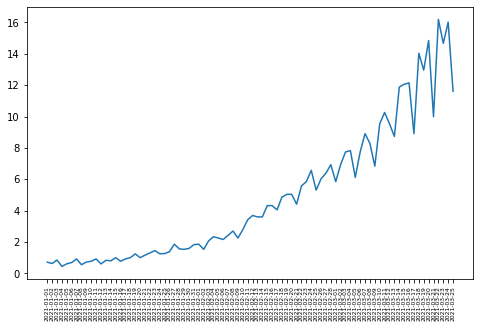

In [321]:
# plot the time series data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(df_data.date.values, df_data.data.values)
plt.xticks(fontsize=6, rotation=90)  # Adjust font size and rotation angle
plt.show()

In [322]:
from statsmodels.tsa.stattools import adfuller

In [323]:
# ADF test
ADF_result = adfuller(df_data.data)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 2.742016573457476
p-value: 1.0


__Interpretation:__ The p-value greater than 0.05, we cannot reject the nullhypothesis stating that our time series is __not__ stationary.

### 4.1.3 Differencing

__One-Step differencing__

In [324]:
diff_data1 = np.diff(df_data.data, n=1) # n=1 is one-step

In [325]:
print(df_data.data.values)

[ 0.71      0.63      0.85      0.44      0.61      0.69      0.92
  0.55      0.72      0.77      0.92      0.6       0.83      0.8
  1.        0.77      0.92      1.        1.24      1.        1.16
  1.3       1.45      1.25      1.26      1.38      1.86      1.56
  1.53      1.59      1.83      1.86      1.53      2.07      2.34
  2.25      2.16      2.43      2.7       2.25      2.79      3.42
  3.69      3.6       3.6       4.32      4.32      4.05      4.86
  5.04      5.04      4.41      5.58      5.85      6.57      5.31
  6.03      6.39      6.93      5.85      6.93      7.74      7.83
  6.12      7.74      8.91      8.28      6.84      9.54     10.26
  9.54      8.729999 11.88     12.06     12.15      8.91     14.04
 12.96     14.85      9.99     16.2      14.67     16.02     11.61    ]


In [326]:
print(diff_data1) # -0.08 = 0.63(y_t) - 0.71(y_t-1)

[-0.08      0.22     -0.41      0.17      0.08      0.23     -0.37
  0.17      0.05      0.15     -0.32      0.23     -0.03      0.2
 -0.23      0.15      0.08      0.24     -0.24      0.16      0.14
  0.15     -0.2       0.01      0.12      0.48     -0.3      -0.03
  0.06      0.24      0.03     -0.33      0.54      0.27     -0.09
 -0.09      0.27      0.27     -0.45      0.54      0.63      0.27
 -0.09      0.        0.72      0.       -0.27      0.81      0.18
  0.       -0.63      1.17      0.27      0.72     -1.26      0.72
  0.36      0.54     -1.08      1.08      0.81      0.09     -1.71
  1.62      1.17     -0.63     -1.44      2.7       0.72     -0.72
 -0.810001  3.150001  0.18      0.09     -3.24      5.13     -1.08
  1.89     -4.86      6.21     -1.53      1.35     -4.41    ]


In [327]:
# ADF test for diff data
ADF_result = adfuller(diff_data1)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.4074097636380299
p-value: 0.9088542416911333


__Two-Step differencing__ as p > 0.05 after one-step

In [328]:
diff_data2 = np.diff(df_data.data, n=2) # n=2 is two-step

In [329]:
print(diff_data1) # one-step sereis

[-0.08      0.22     -0.41      0.17      0.08      0.23     -0.37
  0.17      0.05      0.15     -0.32      0.23     -0.03      0.2
 -0.23      0.15      0.08      0.24     -0.24      0.16      0.14
  0.15     -0.2       0.01      0.12      0.48     -0.3      -0.03
  0.06      0.24      0.03     -0.33      0.54      0.27     -0.09
 -0.09      0.27      0.27     -0.45      0.54      0.63      0.27
 -0.09      0.        0.72      0.       -0.27      0.81      0.18
  0.       -0.63      1.17      0.27      0.72     -1.26      0.72
  0.36      0.54     -1.08      1.08      0.81      0.09     -1.71
  1.62      1.17     -0.63     -1.44      2.7       0.72     -0.72
 -0.810001  3.150001  0.18      0.09     -3.24      5.13     -1.08
  1.89     -4.86      6.21     -1.53      1.35     -4.41    ]


In [330]:
print(np.array([f"{_:.2f}" for _ in diff_data2])) # 0.30 = 0.22(y_k) - (-0.08)(y_k-1): k is one-step sereis index

['0.30' '-0.63' '0.58' '-0.09' '0.15' '-0.60' '0.54' '-0.12' '0.10'
 '-0.47' '0.55' '-0.26' '0.23' '-0.43' '0.38' '-0.07' '0.16' '-0.48'
 '0.40' '-0.02' '0.01' '-0.35' '0.21' '0.11' '0.36' '-0.78' '0.27' '0.09'
 '0.18' '-0.21' '-0.36' '0.87' '-0.27' '-0.36' '0.00' '0.36' '0.00'
 '-0.72' '0.99' '0.09' '-0.36' '-0.36' '0.09' '0.72' '-0.72' '-0.27'
 '1.08' '-0.63' '-0.18' '-0.63' '1.80' '-0.90' '0.45' '-1.98' '1.98'
 '-0.36' '0.18' '-1.62' '2.16' '-0.27' '-0.72' '-1.80' '3.33' '-0.45'
 '-1.80' '-0.81' '4.14' '-1.98' '-1.44' '-0.09' '3.96' '-2.97' '-0.09'
 '-3.33' '8.37' '-6.21' '2.97' '-6.75' '11.07' '-7.74' '2.88' '-5.76']


In [331]:
# ADF test for diff data
ADF_result = adfuller(diff_data2)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -3.585162874793185
p-value: 0.006051099869603092


__Interpretation:__ Two step time series is stationanry as p < 0.05.

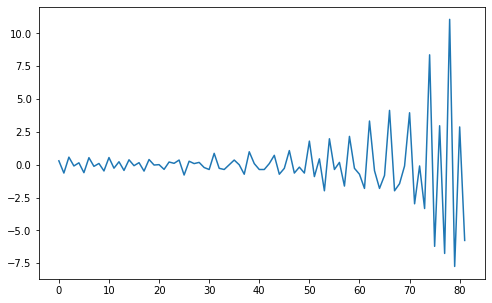

In [332]:
# plot the two step time series data
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(diff_data2)
plt.show()

### 4.1.4 The autocorrelation function (ACF)

The autocorrelation function (ACF) measures the linear relationship between lagged values of a time series.

In other words, it measures the correlation (covariance) of the time series with itself.


$\text{Cov}(x_t, x_{t-k}) = \frac{1}{N} \sum_{t=k+1}^{N} (x_t - \mu)(x_{t-k} - \mu)$

- $k$ is the lag;
- $x_t$ is the value at time $t$ ;
- $x_{t-k}$  is the value at time $t-k$ ;
- $\mu$ is the mean of the time series ;
- $N$ is the number of observations. 

In [333]:
from statsmodels.graphics.tsaplots import plot_acf

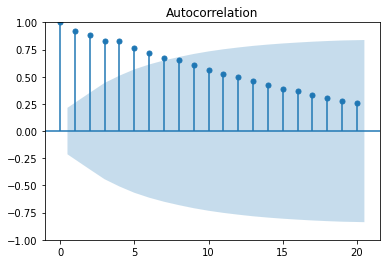

In [334]:
# X-Axis: Displays the lag values.
# Y-Axis: Displays the autocorrelation values ranging from -1 to 1.
# Note that the shaded area represents a confidence interval. 
# If a point is within the shaded area, then it is not significantly different from 0.
# Otherwise, the autocorrelation coefficient is significant.
plot_acf(df_data.data, lags=20)
plt.show()

## 4.2 MA($q$), AR($p$),ARMA ($p$,$q$) models

### 4.2.1 Moving average model (MA) -- ($q$)

In a moving average (MA) process, the current value depends linearly on the __mean__ of the series, the __current error__ term, and __past error__ terms. 

The moving average model is denoted as MA($q$), where $q$ is the order. 

The general expression of an MA($q$) model is:

$$ y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} $$

- The present ($t$) error term $\epsilon_t$ , and past error terms $\epsilon_{t-q}$ ;
- The magnitude of the impact of past errors on the present value is quantified using a coefficient denoted as $\theta_q$ .

### 4.2.2 Autoregressive model (AR) -- ($p$)

An autoregressive process is a regression of a variable against itself. 

In a time series, this means that the present value is linearly dependent on its __past values__. 

The autoregressive process is denoted as AR($p$), where $p$ is the order. 

The generalexpression of an AR($p$) model is:

$$y_t = C + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t$$

- A constant $C$;
- The present error term $\epsilon_t$ , which is also white noise;
- The past values of the series $y_{t-p}$;
- The magnitude of the influence of the past values on the present value is denoted as $\phi_p$, which represents the coefficients of the AR ($p$) model. 


__Partial autocorrelation__ measures __the correlation between lagged values__ in a time series when we remove the influence of correlated lagged values in between. 

It measures the direct relationship between an observation and its lag, removing the effect of the intermediate lags. 

It essentially gives the partial correlation of a time series with its own lagged values, controlling for the effect of other lags.

We can plot the partial autocorrelation function to determine the order of a stationary AR($p$) process. 

The coefficients will be non-significant after lag $p$.

In [335]:
from statsmodels.graphics.tsaplots import plot_pacf

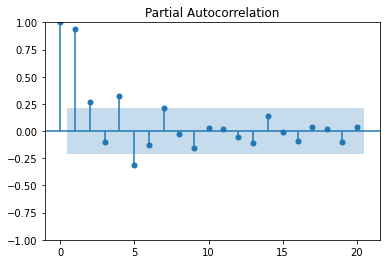

In [336]:
# Plot partial autocorrelation
plot_pacf(df_data.data, lags=20)
plt.show()

### 4.2.3 Autoregressive moving average model (ARMA) -- ($p$, $q$)

The autoregressive moving average process is a combination of the autoregressive process and the moving average process.

It is denoted as ARMA($p$,$q$), where $p$ is the order of the autoregressive process, and $q$ is the order of the moving average process. 

The general equation of the ARMA($p$,$q$)model is:

$$y_t = C + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}
$$

Note:

- An ARMA($0,q$) process is equivalent to an MA($q$) process, since the order $p = 0$ cancels the AR($p$) portion. 

- An ARMA($p,0$) process is equivalent to an AR($p$) process, sincethe order $q = 0$ cancels the MA($q$) portion.

## 4.3 ARIMA -- ($p$, $d$, $q$)

__An autoregressive integrated moving average (ARIMA) model__ is the combination of the AR($p$) and MA($q$) processes, but in terms of the differenced series.

It is denoted as ARIMA($p,d,q$), where $p$ is the order of the AR($p$) process, $d$ is the order of integration, and $q$ is the order of the MA($q$) process.

__Integration__ is the reverse of differencing, and the order of integration $d$ is equal to **the number of times the series has been differenced** to be rendered stationary. 

The general equation of the ARIMA($p,d,q$) process is:

$$y'_t = \Delta^d y_t$$


$$y'_t = C + \phi_1 y'_{t-1} + \dots + \phi_p y'_{t-p} + \theta_1 \epsilon'_{t-1} + \dots + \theta_q \epsilon'_{t-q} + \epsilon_t$$


Note that $y'_t$ represents the differenced series after $d$ times, and it may have been differenced more than once.

__The Akaike information criterion (AIC)__ is a measure of the quality of a model in relation to other models. 

It is used for model selection.

The AIC is a function of the number of parameters $k$ in a model and the maximum value of the likelihood function $\hat{L}$:

$$ \text{AIC} = 2k - 2 \ln(\hat{L}) $$

The lower the value of the AIC, the better the model. 

Selecting according to the AIC allows us to keep a balance between the complexity of a model and its goodness of fit to the data.

__[SARIMAX](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)__  **is acomplex algrithm that allows us to consider seasonal effects, autoregressive processes, non-stationary time series, moving average processes, and exogenous variables all in asingle model.**

__Key parameters for ARIMA model in SRIMAX algorithm:__

- endog: time series y 
- order: (p, d, q)

__Step1: Set optimization function for ARIMA parameter tuning using AIC__

In [337]:
from typing import Union
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int):
    results = []
    for order in order_list:
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic
            results.append([order, aic])
        except Exception as e:
            # Print or log the exception if needed
            print(f"Error encountered for order {order}: {str(e)}")
            continue

    # Convert results to DataFrame and sort by AIC
    result_df = pd.DataFrame(results, columns=['(p,q)', 'AIC'])
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df


__Step2: Set parameter ranges__

In [338]:
from itertools import product
ps = range(0, 4, 1) # set p range 
qs = range(0, 4, 1) # set q range 
d = 2 # set d (this can be range as well)
order_list = list(product(ps, qs))
print(order_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3), (3, 0), (3, 1), (3, 2), (3, 3)]


__Step3: Training__

In [339]:
# training set and testing set
train_data = df_data.data[:-4]
test_data = df_data.data[-4:]

In [340]:
%%time

import warnings
warnings.filterwarnings('ignore')

result_df = optimize_ARIMA(train_data, order_list, d)

CPU times: user 3.71 s, sys: 1.3 s, total: 5.01 s
Wall time: 1.46 s


In [341]:
result_df

(p,q)         AIC
0   (3, 3)  115.267743
1   (3, 1)  115.624980
2   (3, 2)  115.672008
3   (3, 0)  154.430647
4   (0, 3)  194.654716
5   (0, 2)  209.274546
6   (2, 3)  220.666910
7   (1, 3)  228.267748
8   (1, 2)  228.935800
9   (2, 2)  229.974685
10  (2, 1)  234.501112
11  (1, 1)  236.117317
12  (0, 1)  252.605596
13  (2, 0)  280.299907
14  (1, 0)  280.389386
15  (0, 0)  320.324435

__Step4: Selecting the best p,d,q for ARIMA__

In [342]:
model = SARIMAX(train_data, order=(3,2,3), simple_differencing=False) # Selecting the best p,d,q for ARIMA
model_fit = model.fit(disp=False) 

__Step5: Residual analysis/diagnosis__

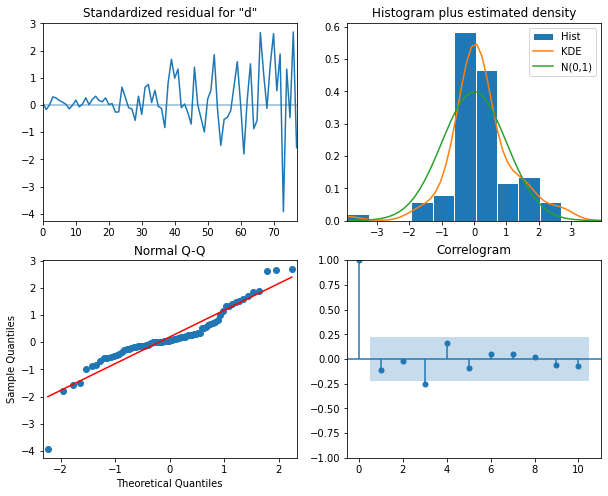

In [343]:
# plot_diagnostics
model_fit.plot_diagnostics(figsize=(10,8)) 
plt.show()

__Interpretation:__  

- The top-left plot shows the residuals over time: While there is no trend in the residuals, the variance does not seem to be constant, which is a discrepancy in comparison to white noise.
- The Q-Q plot leads us to the same conclusion, as it displays a line that is fairly straight, meaning that the residuals’ distribution is close to a normal distribution (also shown as top-right histogram).
- The correlogram at the bottom right shows no significant coefficients after lag 0, just like white noise, though a coefficient seems to be significant at lag 3 (There are no significant  autocorrelation coefficients before this lag, so it can be assumed that is due to chance ).
 

__Ljung-Box test__ is used to determine whether the residuals are correlated. 

We’ll apply the test on the first 10 lags and study the p-values. 

If all p-values are greater than 0.05, we cannot reject the null hypothesis and we’ll conclude that the residuals are not correlated, just like white noise.

In [344]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
residuals = model_fit.resid
df_al = acorr_ljungbox(residuals, np.arange(1, 11, 1)) ## 10 lags 
df_al['lags'] = np.arange(1, 11, 1)

In [345]:
df_al

lb_stat  lb_pvalue  lags
1    1.698232   0.192519     1
2    1.701110   0.427178     2
3    7.277856   0.063550     3
4    9.237764   0.055424     4
5    9.866734   0.079101     5
6   10.122885   0.119572     6
7   10.377152   0.168189     7
8   10.404992   0.237743     8
9   10.746134   0.293512     9
10  11.168635   0.344532    10

__Step6: Forecasting and testing__

In [346]:
df_data

date   data
0   2021-01-01   0.71
1   2021-01-02   0.63
2   2021-01-03   0.85
3   2021-01-04   0.44
4   2021-01-05   0.61
..         ...    ...
79  2021-03-21   9.99
80  2021-03-22  16.20
81  2021-03-23  14.67
82  2021-03-24  16.02
83  2021-03-25  11.61

[84 rows x 2 columns]

In [347]:
# In our case, we use the previous 80 days to train the model and predict the last 4 days. 
ARIMA_pred = model_fit.get_prediction(80, 83).predicted_mean # model_fit.forecast(steps=4)

In [348]:
ARIMA_pred

80    15.861881
81    14.381471
82    16.363662
83    11.676897
Name: predicted_mean, dtype: float64

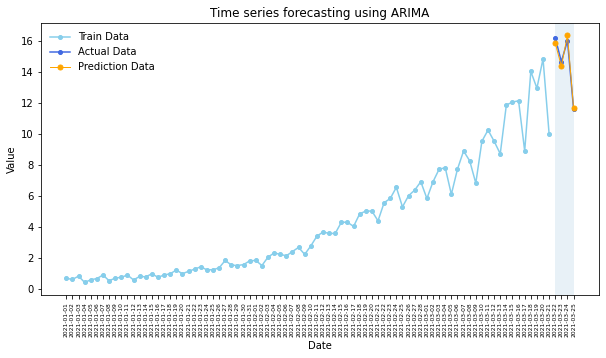

In [349]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_data.date[:-4].values, train_data.values, color='skyblue', lw=1.5, marker='o', markersize=4, label='Train Data')
plt.plot(df_data.date[-4:].values, test_data.values, color='royalblue', lw=1.5, marker='o',markersize=4,label='Actual Data')
plt.plot(df_data.date[-4:].values, ARIMA_pred.values, color='orange',lw=1, marker='o', markersize=5, label='Prediction Data')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time series forecasting using ARIMA')
plt.legend(frameon=False)
plt.axvspan(80,83, alpha=0.1)
plt.xticks(fontsize=6, rotation=90)  # Adjust fontsize and rotation angle
plt.show()

__Some metrics: MAPE, MSE__

In [350]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [351]:
# ARIMA Vs Naive(use fromer values represent the predicted values)
naive_pred = df_data.data[76:80]

# Calculate Mean Squared Error (MSE)
mse_a = mean_squared_error(test_data, ARIMA_pred)
mse_n = mean_squared_error(test_data, naive_pred)
print(f"ARIMA Mean Squared Error (MSE): {mse_a}", f"Naive Mean Squared Error (MSE): {mse_n}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape_a = mean_absolute_percentage_error(test_data, ARIMA_pred)
mape_n = mean_absolute_percentage_error(test_data, naive_pred)
print(f"ARIMA Mean Absolute Percentage Error (MAPE): {mape_a}", f" Naive Mean Absolute Percentage Error (MAPE): {mape_n}")


ARIMA Mean Squared Error (MSE): 0.08003808630185992 Naive Mean Squared Error (MSE): 2.8957499999999987
ARIMA Mean Absolute Percentage Error (MAPE): 0.016938396570566745  Naive Mean Absolute Percentage Error (MAPE): 0.11561658552433654


## 4.4 SARIMA($p,d,q$)($P,D,Q$)$m$

__Seasonal autoregressive integrated moving average (SARIMA) model__ adds seasonal parameters to the ARIMA(p,d,q) model.

It is denoted as SARIMA($p,d,q$)($P,D,Q$)$m$, where 

- $P$ is the order of the seasonal AR($P$) process; 

- $D$ is the __seasonal order of integration__; 

- $Q$ is the order of the seasonal MA($Q$)process; 

- $m$ is the frequency or the number of **observations per seasonal cycle**.

__Note__ that a SARIMA($p,d,q$)($0,0,0$)$m$ model is equivalent to an ARIMA($p,d,q$) model.

### 4.4.1 What is frequencey $m$?

**Appropriate frequency $m$ depending on the data:**

Data collection|Frequencey $m$ (observation unit/level)
--|--  
Annual|1
Quarterly|4
Monthly|12
Weekly|52
Daily|365
Hourly|8760

Please download the sample data [here](https://hullacuk-my.sharepoint.com/:x:/g/personal/tongxin_chen_hull_ac_uk/EbNH-DBkOilKu_hZsZUoXt8BLwPVb5jDtBRmIQEpXEdgkw?e=F1X2yA).

In [352]:
# use the air passengers data for analysis
df_ap = pd.read_csv('air-passengers.csv', index_col=0)

In [353]:
df_ap.head()

Passengers
Month              
1949-01         112
1949-02         118
1949-03         132
1949-04         129
1949-05         121

In [354]:
# set index to datatime type
df_ap.index = pd.to_datetime(df_ap.index)

__Plotting the time series datacan help to observe periodic patterns (frequencey).__

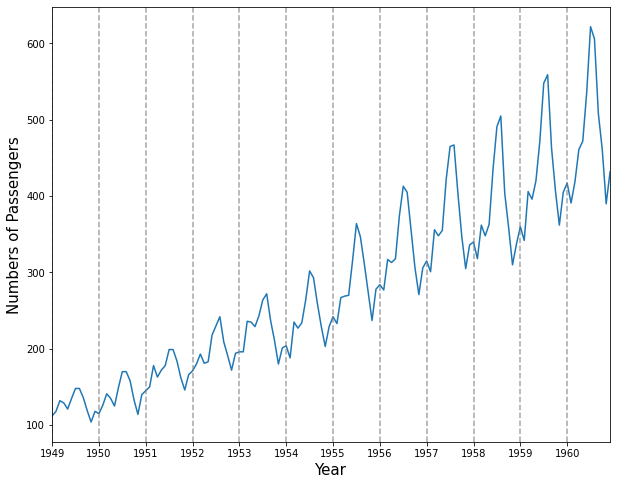

In [355]:
# Plot the time series
df_ap.plot(figsize=(10, 8), legend=False)

# Add vertical lines for each year
years = pd.to_datetime(df_ap.index.year.unique().values, format='%Y')
for year in years:
    plt.axvline(x=year, color='grey', linestyle='--', alpha=0.7)

plt.xticks(years, labels=df_ap.index.year.unique().values)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Numbers of Passengers', fontsize=15)
plt.show()

__Another way of identifying seasonal patterns is using time series decomposition.__

**Note:** In a time series without a seasonal pattern, the decomposition process will show the seasonal component as a flat horizontal line at 0.

In [356]:
## decomposition of time series
from statsmodels.tsa.seasonal import STL
decomposition = STL(df_ap['Passengers'], period=12).fit()

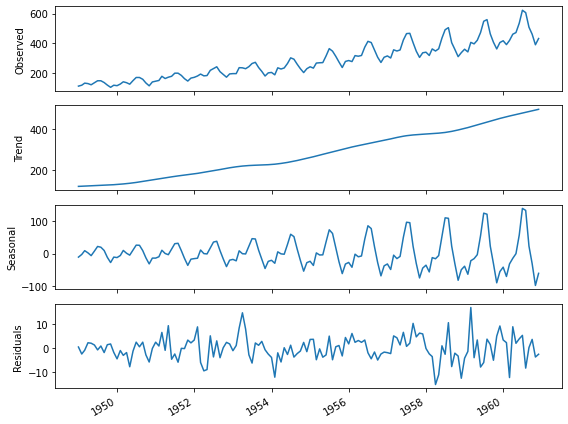

In [357]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8,6))
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
fig.autofmt_xdate()
plt.tight_layout()

__Interpretation:__ 

- The summer months (July and August) usually have the highest numbers of air passengers in one year;
- If we are to forecast the month of July in 1961, the information coming from the month of July in prior years is likely going to be useful, since we can intuitively expect the number of air passengers to be at its highest point in the month of July 1961;
- The parameters $P, D, Q,$ and $m$ allow us to capture that information from the previous seasonal cycle and help us forecast our time series.

### 4.4.2 Forecasting using a SRIMA model

In [358]:
# The result of ADF test show this time series is non-stationary
ad_fuller_result = adfuller(df_ap['Passengers'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641


In [359]:
# The hyperparameter tuning of SARIMA
from typing import Union
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMA(endog: Union[pd.Series, list], order_list:list, m:int):
    results = []
    for order in order_list:
        try:
            model = SARIMAX(endog, 
                            order=(order[0], order[1], order[2]), 
                            seasonal_order=(order[3], order[4], order[5], m),
                            simple_differencing=False).fit(disp=False)
            aic = model.aic
            results.append([order[0:3], order[3:], aic])
        except Exception as e:
            # Print or log the exception if needed
            print(f"Error encountered for order {order}: {str(e)}")
            continue

    # Convert results to DataFrame and sort by AIC
    result_df = pd.DataFrame(results, columns=['(p,d,q)','(P,D,Q)', 'AIC'])
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [360]:
# Set the ranges of parameters
from itertools import product
ps = range(0, 3, 1) 
ds = range(1, 3, 1)
qs = range(0, 3, 1)   

Ps = range(0, 3, 1)
Ds = range(1, 3, 1)
Qs = range(0, 3, 1)
m = 12

SARIMA_order_list = list(product(ps,ds,qs,Ps,Ds,Qs))
print(len(SARIMA_order_list), 'sets of parameters')

324 sets of parameters


In [361]:
# Training and testing set
train = df_ap['Passengers'][:-12]
test = df_ap['Passengers'][-12:]

In [362]:
%%time

import warnings
warnings.filterwarnings('ignore')

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, 12)

CPU times: user 33min 50s, sys: 13min 44s, total: 47min 34s
Wall time: 5min 52s


In [363]:
# The result df
SARIMA_result_df

(p,d,q)    (P,D,Q)          AIC
0    (1, 1, 0)  (0, 2, 2)   821.076615
1    (0, 1, 1)  (0, 2, 2)   821.836962
2    (1, 1, 0)  (1, 2, 1)   821.936191
3    (1, 1, 0)  (1, 2, 2)   822.749950
4    (0, 1, 1)  (1, 2, 1)   823.011918
..         ...        ...          ...
319  (0, 2, 0)  (2, 1, 0)  1004.515070
320  (0, 2, 0)  (0, 1, 0)  1004.691880
321  (0, 2, 0)  (2, 1, 2)  1005.651515
322  (0, 2, 0)  (2, 1, 1)  1006.262253
323  (0, 2, 0)  (1, 1, 2)  1006.296666

[324 rows x 3 columns]

In [364]:
# Selecting the optimised parameters for SARIMA
SARIMA_model = SARIMAX(train, order=(1,1,0), seasonal_order=(0,2,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

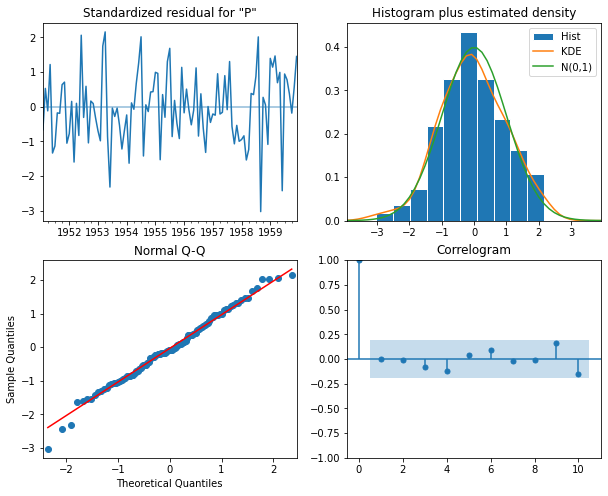

In [365]:
# The residual analysis for optimised SARIMA, see the interpretation listed in the last section.
SARIMA_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()

In [366]:
# Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = SARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 11, 1))

lb_stat  lb_pvalue
1   0.085547   0.769917
2   1.102212   0.576312
3   1.107642   0.775230
4   1.115502   0.891805
5   1.356114   0.929053
6   1.430702   0.963964
7   1.933433   0.963433
8   2.159737   0.975719
9   2.179898   0.988293
10  4.478780   0.923175

In [367]:
# Based on the results from residual analysis and Ljung-Box test, 
# we can use this model to forecast the next 12 months
SARIMA_pred = SARIMA_model_fit.forecast(steps=12)
SARIMA_pred

1960-01-01    420.748577
1960-02-01    399.592695
1960-03-01    463.925644
1960-04-01    452.694220
1960-05-01    476.835462
1960-06-01    541.861999
1960-07-01    617.872433
1960-08-01    629.562496
1960-09-01    523.689146
1960-10-01    464.830836
1960-11-01    414.557761
1960-12-01    456.167147
Freq: MS, Name: predicted_mean, dtype: float64

__Use ARIMA to predict the last 12 months and compare to SARIMA__

In [368]:
# set the ranges of parameters, here we also use the SARIMA-optimised function 
 
ps = range(0, 10, 1) 
ds = range(1, 5, 1)
qs = range(0, 10, 1)   

# Here, we set P,D,Q,m as 0, then build an ARIMA (a SARIMA(p,d,q)(0,0,0)m model is equivalent to an ARIMA(p,d,q) model.)
Ps = range(0, 1, 1) 
Ds = range(0, 1, 1)
Qs = range(0, 1, 1)
m = 0

ARIMA_order_list = list(product(ps,ds,qs,Ps,Ds,Qs))
print(len(ARIMA_order_list), 'sets of parameters')

400 sets of parameters


In [369]:
%%time

import warnings
warnings.filterwarnings('ignore')
ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, 12)
ARIMA_result_df

CPU times: user 15min 30s, sys: 5min 37s, total: 21min 7s
Wall time: 2min 54s


(p,d,q)    (P,D,Q)          AIC
0    (8, 2, 8)  (0, 0, 0)  1134.460313
1    (9, 1, 9)  (0, 0, 0)  1134.481588
2    (8, 1, 8)  (0, 0, 0)  1136.585504
3    (8, 1, 9)  (0, 0, 0)  1139.937877
4    (9, 2, 8)  (0, 0, 0)  1142.795199
..         ...        ...          ...
395  (0, 3, 0)  (0, 0, 0)  1413.932027
396  (3, 4, 0)  (0, 0, 0)  1415.764808
397  (2, 4, 0)  (0, 0, 0)  1422.180152
398  (1, 4, 0)  (0, 0, 0)  1475.515080
399  (0, 4, 0)  (0, 0, 0)  1544.442955

[400 rows x 3 columns]

In [370]:
# Selecting the optimised parameters for ARIMA
ARIMA_model = SARIMAX(train, order=(8,2,8), seasonal_order=(0,0,0,0), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)
# Forecasting next 12 months
ARIMA_pred = ARIMA_model_fit.forecast(steps=12)
ARIMA_pred

1960-01-01    408.216041
1960-02-01    362.539537
1960-03-01    382.003559
1960-04-01    403.112808
1960-05-01    482.384349
1960-06-01    537.295606
1960-07-01    562.480453
1960-08-01    533.949916
1960-09-01    487.006783
1960-10-01    486.411432
1960-11-01    427.875248
1960-12-01    423.583321
Freq: MS, Name: predicted_mean, dtype: float64

__Note: Run the residual for ARIMA and generate the interpretation__

__Comparing the performace for SARIMA and ARIMA__

In [371]:
df_test = pd.DataFrame(test)
df_test['ARIMA_pred'] = ARIMA_pred.values
df_test['SARIMA_pred'] = SARIMA_pred.values

In [372]:
df_test

Passengers  ARIMA_pred  SARIMA_pred
Month                                          
1960-01-01         417  408.216041   420.748577
1960-02-01         391  362.539537   399.592695
1960-03-01         419  382.003559   463.925644
1960-04-01         461  403.112808   452.694220
1960-05-01         472  482.384349   476.835462
1960-06-01         535  537.295606   541.861999
1960-07-01         622  562.480453   617.872433
1960-08-01         606  533.949916   629.562496
1960-09-01         508  487.006783   523.689146
1960-10-01         461  486.411432   464.830836
1960-11-01         390  427.875248   414.557761
1960-12-01         432  423.583321   456.167147

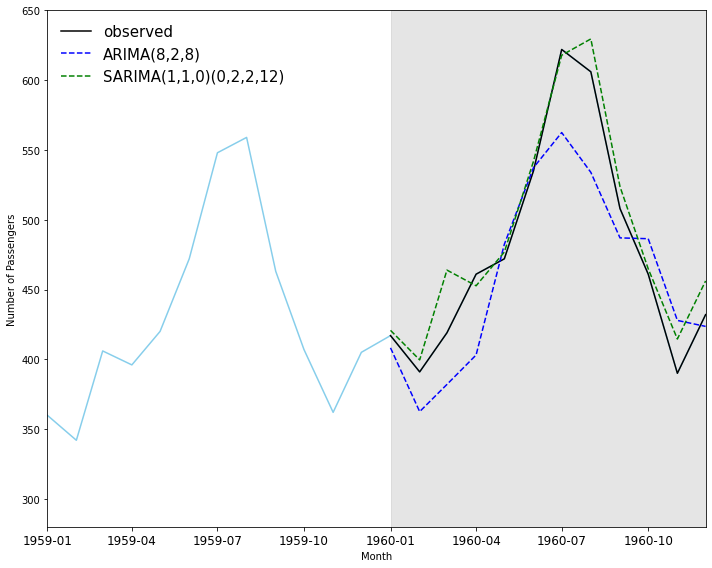

In [373]:
## Plot the prediction plot
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df_ap['Passengers'], 'skyblue')
ax.plot(df_test['Passengers'], 'k-', label='observed')
ax.plot(df_test['ARIMA_pred'], 'b--', label='ARIMA(8,2,8)')
ax.plot(df_test['SARIMA_pred'], 'g--', label='SARIMA(1,1,0)(0,2,2,12)')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.axvspan('1960-01', '1960-12', color='#808080', alpha=0.2)
ax.legend(loc=2, fontsize=15, frameon=False)
ax.set_xlim(pd.to_datetime("1959-01-01"), pd.to_datetime("1960-12-01")) 
ax.set_ylim(280, 650)
plt.xticks(fontsize=12, rotation=0)  # Adjust font size and rotation angle
plt.tight_layout()

In [374]:
 # ARIMA Vs SARIMA 
 
# Calculate Mean Squared Error (MSE)
mse_arima = mean_squared_error(test, ARIMA_pred)
mse_sarima = mean_squared_error(test, SARIMA_pred)
print(f"ARIMA MSE : {mse_arima}", 
      f"SARIMA MSE : {mse_sarima}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape_arima = mean_absolute_percentage_error(test, ARIMA_pred)
mape_sarima = mean_absolute_percentage_error(test, SARIMA_pred)
print(f"ARIMA MAPE: {mape_arima}",
      f"SARIMA MAPE: {mape_sarima}")


ARIMA MSE : 1420.46216860618 SARIMA MSE : 355.4867995632803
ARIMA MAPE: 0.06347022713645085 SARIMA MAPE: 0.0319081168376085


## 4.5 Machine learning models (XGBoost)

In [375]:
# We use the air passenger data as an example
df_ap = pd.read_csv('air-passengers.csv', index_col=0)
# set index to datatime type
df_ap.index = pd.to_datetime(df_ap.index)

In [376]:
df_ap

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

In [377]:
# create an month and generate basic features
df_ap['Month'] = pd.to_datetime(df_ap.index)
df_ap['month'] = df_ap['Month'].dt.month
df_ap['quarter'] = df_ap['Month'].dt.quarter
df_ap['year'] = df_ap['Month'].dt.year
df_ap.drop(columns=['Month'])

Passengers  month  quarter  year
Month                                       
1949-01-01         112      1        1  1949
1949-02-01         118      2        1  1949
1949-03-01         132      3        1  1949
1949-04-01         129      4        2  1949
1949-05-01         121      5        2  1949
...                ...    ...      ...   ...
1960-08-01         606      8        3  1960
1960-09-01         508      9        3  1960
1960-10-01         461     10        4  1960
1960-11-01         390     11        4  1960
1960-12-01         432     12        4  1960

[144 rows x 4 columns]

In [378]:
# create lagged features (shift to right)
for lag in range(1,25):
    df_ap[f'lag_{lag}'] = df_ap['Passengers'].shift(lag).values

In [379]:
df_ap

Passengers      Month  month  quarter  year  lag_1  lag_2  lag_3  \
Month                                                                          
1949-01-01         112 1949-01-01      1        1  1949    NaN    NaN    NaN   
1949-02-01         118 1949-02-01      2        1  1949  112.0    NaN    NaN   
1949-03-01         132 1949-03-01      3        1  1949  118.0  112.0    NaN   
1949-04-01         129 1949-04-01      4        2  1949  132.0  118.0  112.0   
1949-05-01         121 1949-05-01      5        2  1949  129.0  132.0  118.0   
...                ...        ...    ...      ...   ...    ...    ...    ...   
1960-08-01         606 1960-08-01      8        3  1960  622.0  535.0  472.0   
1960-09-01         508 1960-09-01      9        3  1960  606.0  622.0  535.0   
1960-10-01         461 1960-10-01     10        4  1960  508.0  606.0  622.0   
1960-11-01         390 1960-11-01     11        4  1960  461.0  508.0  606.0   
1960-12-01         432 1960-12-01     12        4  1960  390.0  461.0  508.0   

            lag_4  lag_5  ...  lag_15  lag_16  lag_17  lag_18  lag_19  lag_20  \
Month                     ...                                                   
1949-01-01    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1949-02-01    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1949-03-01    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1949-04-01    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1949-05-01  112.0    NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
...           ...    ...  ...     ...     ...     ...     ...     ...     ...   
1960-08-01  461.0  419.0  ...   420.0   396.0   406.0   342.0   360.0   337.0   
1960-09-01  472.0  461.0  ...   472.0   420.0   396.0   406.0   342.0   360.0   
1960-10-01  535.0  472.0  ...   548.0   472.0   420.0   396.0   406.0   342.0   
1960-11-01  622.0  535.0  ...   559.0   548.0   472.0   420.0   396.0   406.0   
1960-12-01  606.0  622.0  ...   463.0   559.0   548.0   472.0   420.0   396.0   

            lag_21  lag_22  lag_23  lag_24  
Month                                       
1949-01-01     NaN     NaN     NaN     NaN  
1949-02-01     NaN     NaN     NaN     NaN  
1949-03-01     NaN     NaN     NaN     NaN  
1949-04-01     NaN     NaN     NaN     NaN  
1949-05-01     NaN     NaN     NaN     NaN  
...            ...     ...     ...     ...  
1960-08-01   310.0   359.0   404.0   505.0  
1960-09-01   337.0   310.0   359.0   404.0  
1960-10-01   360.0   337.0   310.0   359.0  
1960-11-01   342.0   360.0   337.0   310.0  
1960-12-01   406.0   342.0   360.0   337.0  

[144 rows x 29 columns]

In [380]:
# Training and testing data set

training_data = df_ap.query('Month < "1960-01-01"')
print(training_data.shape)

testing_data = df_ap.query('Month >= "1960-01-01"')
print(testing_data.shape)

X_train = training_data[['month', 'quarter', 'year']]
y_train = training_data['Passengers']
 
X_test = testing_data[['month', 'quarter', 'year']]
y_test = testing_data['Passengers']

(132, 29)
(12, 29)


In [381]:
%%time
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
 
# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=30)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "n_estimators": [50, 100, 300, 500],
    "colsample_bytree": [0.3, 0.5, 0.7, 0.9]
 }
 
 
grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

CPU times: user 14min 44s, sys: 18.4 s, total: 15min 3s
Wall time: 57.4 s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=30),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impor...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
           

In [382]:
# best params for xgboost
print(grid_search.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 500}


In [383]:
# optimised xgboost
best_model = grid_search.best_estimator_

In [384]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
 
def evaluate_model(y_test, prediction):
      # print(f"MAE: {mean_absolute_error(y_test, prediction)}")
      print(f"MSE: {mean_squared_error(y_test, prediction)}")
      print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

In [385]:
# Evaluating GridSearch results
XGBOOST_pred = best_model.predict(X_test)
# plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, XGBOOST_pred)

MSE: 2553.3026218868326
MAPE: 0.09988966128583528


__Further exploration:__

- Why XGBoost performace is worse than SARIMA on this data?
- Any techniques can be used to improve the XGBoost (rolling forecasting, more featuring engineering)?
- Deep learning model (RNN, LSTM, CNN)?
- Bigger Data?